<a href="https://colab.research.google.com/github/timav566/Python-school-ML-practice/blob/main/base_Gen_Scale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool
from operator import itemgetter, attrgetter
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
X_train = (pd.read_csv('h_10_X_train.csv')).values
X_test = (pd.read_csv('h_10_X_test.csv')).values
X_val = (pd.read_csv('h_10_X_val.csv')).values
Y_train = (pd.read_csv('h_10_Y_train.csv')['0']).values
Y_test = (pd.read_csv('h_10_Y_test.csv')['0']).values
Y_val = (pd.read_csv('h_10_Y_val.csv')['0']).values

In [ ]:
model = CatBoostRegressor(iterations = 100)
model.fit(X_train, Y_train, verbose = False)

In [ ]:
model.score(X_val, Y_val)

0.7809819287627094

In [ ]:
class individual:
  
  def __init__(self, features, score = 0, val_score = 0):
    self.features = features
    self.score = score
    self.val_score = val_score
    
  def get_score(self, X_train, Y_train, X_test, Y_test, X_val, Y_val, iterations = 100):
    model = CatBoostRegressor(iterations)
    dfX = pd.DataFrame(X_train)
    dfX1 = pd.DataFrame(X_test)
    dfX2 = pd.DataFrame(X_val)
    for i in range (len(self.features)):
      if (self.features[i] == 0):
          del dfX[i]
          del dfX1[i]
          del dfX2[i]
    X_train_t = dfX.values
    X_test_t = dfX1.values
    X_val_t = dfX2.values
    model.fit(X_train_t, Y_train, verbose = False)
    self.score = model.score(X_test_t, Y_test)
    self.val_score = model.score(X_val_t, Y_val)
    
  def mutation(self, probability):
    for i in range(len(self.features)):
      if (random.randint(0, 100) < probability):
        self.features[i] = abs(self.features[i] - 1)
  
  def create_new_feature(self):
    if (random.randint(0,1) == 0):
      self.features.append(0)
    else:
      self.features.append(1)
      
  def delete_feature(self, i):
    self.features.pop(i)         
  

In [ ]:
class Dataset:

  def __init__ (self, X_train, Y_train, X_test, Y_test, X_val, Y_val):
    self.X_train = X_train
    self.Y_train = Y_train
    self.X_test = X_test
    self.Y_test = Y_test
    self.X_val = X_val
    self.Y_val = Y_val
  
  def update_new_feature(self, fea_a, fea_b):
    dfX1 = pd.DataFrame(self.X_train) 
    dfX1['123'] = (dfX1[fea_a] + dfX1[fea_b])
    self.X_train = dfX1.values
    dfX2 = pd.DataFrame(self.X_test) 
    dfX2['123'] = (dfX2[fea_a] + dfX2[fea_b])
    self.X_test = dfX2.values
    dfX3 = pd.DataFrame(self.X_val) 
    dfX3['123'] = (dfX3[fea_a] + dfX3[fea_b])
    self.X_val = dfX3.values
    
    
  def delete_feature(self, num):
    dfX = pd.DataFrame(self.X_train)
    dfX.drop(dfX.loc[:,[num]], axis = 1, inplace = True)
    self.X_train = dfX.values 
    dfX1 = pd.DataFrame(self.X_test)
    dfX1.drop(dfX1.loc[:,[num]], axis = 1, inplace = True)
    self.X_test = dfX1.values
    dfX2 = pd.DataFrame(self.X_val)
    dfX2.drop(dfX2.loc[:,[num]], axis = 1, inplace = True)
    self.X_val = dfX2.values
    

In [ ]:
def check_feature(current_set, num):
  flag = True
  for i in current_set:
    if (i.features[num] == 1):
      flag = False
      break
  return flag  

In [ ]:
num_of_individs = 12
best_indiv = [[0 for i in range(len(X_train[0]))] for j in range(num_of_individs)]
for i in range(num_of_individs):
  for j in range(len(X_train[0])):
    best_indiv[i][j] = 1

In [ ]:
ds = Dataset(X_train, Y_train, X_test, Y_test, X_val, Y_val)
current_set = []
for i in range(num_of_individs):
  current_set.append(individual(best_indiv[i]))
  current_set[i].get_score(ds.X_train, ds.Y_train, ds.X_test, ds.Y_test, ds.X_val, ds.Y_val)
current_set = sorted(current_set, key=lambda student: student.score)

In [ ]:
for i in current_set:
  print(i.val_score)

0.7809819287627094
0.7809819287627094
0.7809819287627094
0.7809819287627094
0.7809819287627094
0.7809819287627094
0.7809819287627094
0.7809819287627094
0.7809819287627094
0.7809819287627094
0.7809819287627094
0.7809819287627094


In [ ]:
ans_features = []
ans_score = []
ans_val_score = []

In [ ]:
best_ds = Dataset(X_train, Y_train, X_test, Y_test, X_val, Y_val)
best_features = []
best_score = 0

In [ ]:
num_processes = 50
probability = 3
num_new_fea = 2
d = 0
base = 10
for s in range(num_processes):
  if (s % 5 == 0):
    d = 0
    for i in range(len(ds.X_train[0])):
      if (check_feature(current_set, i - d) == True):
        for j in range(len(current_set)):
          current_set[j].delete_feature(i - d)
        ds.delete_feature(i - d)
        d += 1
  test_generation = []
  for i in range(len(current_set)):
    test_individual = individual(current_set[i].features.copy())
    test_generation.append(test_individual)
  for i in range(num_of_individs):
    for j in range(i + 1, num_of_individs):
      new_indiv_features = []
      for k in range(len(current_set[0].features)):
        if (random.randint(0, 1) == 0):
          new_indiv_features.append(current_set[i].features[k])
        else:
          new_indiv_features.append(current_set[j].features[k])
      test_individual = individual(new_indiv_features)
      test_generation.append(test_individual)
  for i in test_generation:
    i.mutation(probability)
  for i in range(len(current_set)):
    test_individual = individual(current_set[i].features)
    test_generation.append(test_individual)
  for i in range(num_new_fea):
    a = random.randint(0, base - 1)
    b = random.randint(0, base - 1)
    ds.update_new_feature(a, b)
    for g in test_generation:
      g.create_new_feature()
  for i in test_generation:
    i.get_score(ds.X_train, ds.Y_train, ds.X_test, ds.Y_test, ds.X_val, ds.Y_val)
  test_generation = sorted(test_generation, key=lambda student: student.score)  
  for i in range(num_of_individs):
    current_set[i] = test_generation[len(test_generation) - i - 1]
  ans_features.append(current_set[0].features.count(1))
  ans_score.append(current_set[0].score)
  ans_val_score.append(current_set[0].val_score)
  print(current_set[0].features.count(1))
  print(len(current_set[0].features))
  print(current_set[0].score)
  print(current_set[0].val_score)
  if (current_set[0].val_score > best_score):
    best_score = current_set[0].val_score
    best_features = current_set[0].features
    best_ds = ds

9
12
0.7781851663761727
0.764441353805615
11
14
0.7842868062364581
0.7825894223562407
11
16
0.7873573739443624
0.7864635573297925
11
18
0.7873573739443624
0.7864635573297925
11
20
0.7948751800356308
0.7875578824915399
11
17
0.8006659131359855
0.785496034412118
11
19
0.8006659131359855
0.785496034412118
11
21
0.8008133722457959
0.8031807542194487
13
23
0.8036210886527995
0.7939080858506584
13
25
0.8075024983748869
0.7894007340691516
13
21
0.8083413915619108
0.7861931732297327
13
23
0.8083413915619108
0.7861931732297327
13
25
0.8083413915619108
0.7861931732297327
13
27
0.8083413915619108
0.7861931732297327
13
29
0.8083413915619108
0.7861931732297327
13
24
0.8083413915619108
0.7861931732297327
16
26
0.8082286285561411
0.7886696116295124
18
28
0.8089947397015459
0.7994534741821178
16
30
0.812840815471557
0.7879114690402562
16
32
0.812840815471557
0.7879114690402562
23
32
0.8136661294735621
0.7977242455595581
23
34
0.8136661294735621
0.7977242455595581
24
36
0.8141079740810859
0.79616477934

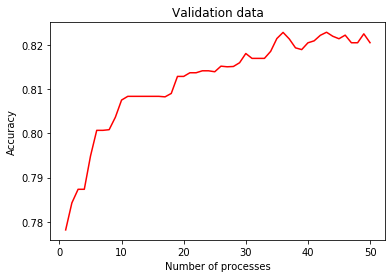

In [ ]:
ans_processes = []
for i in range(1, len(ans_score) + 1):
  ans_processes.append(i)
plt.plot(ans_processes, ans_score, 'r')
plt.xlabel('Number of processes')
plt.ylabel('Accuracy')
plt.title('Validation data')
plt.show()

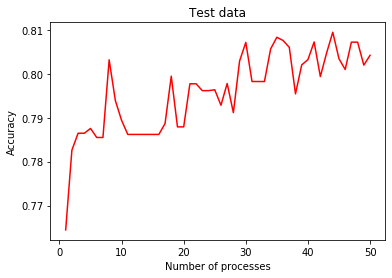

In [ ]:
ans_processes = []
for i in range(1, len(ans_score) + 1):
  ans_processes.append(i)
plt.plot(ans_processes, ans_val_score, 'r')
plt.xlabel('Number of processes')
plt.ylabel('Accuracy')
plt.title('Test data')
plt.show()

In [ ]:
max(ans_val_score)

0.8094671618079132